# Exploratory Data Analysis (EDA)

## Objective

The goal of this EDA is to gain a thorough understanding of the dataset containing migration data for **red-backed shrikes (Lanius collurio)**. This involves exploring the dataset, identifying patterns, and preparing the data for predictive modeling of migratory behaviors. The findings will inform feature engineering, model design, and further analysis steps.

---

## Dataset Overview

The dataset originates from the study **"Migration of red-backed shrikes from the Iberian Peninsula"** and includes geolocator data tracking the migratory behavior of six individual birds. Below are the key details:

- **Time Period**: 2011 to 2014
- **Number of Animals**: 6
- **Total Locations Recorded**: 4,403 geolocated records
- **Key Features**:
  - `timestamp`: Date and time of each recorded location.
  - `location-long` and `location-lat`: Longitude and latitude coordinates of the bird's location.
  - `migration-stage`: Stages in the bird's migration (e.g., stopover or active migration).
  - `gls:light-level`: Environmental light level recorded by the geolocator.

---

## References

- **Tøttrup AP, Pedersen L, et al.** 2017. *Migration of red-backed shrikes from the Iberian Peninsula: optimal or sub-optimal detour?* Journal of Avian Biology, 48(1): 149–154.
- Dataset citation: https://www.doi.org/10.5441/001/1.32m2335q
- Dataset downloaded from: https://www.movebank.org/cms/webapp?gwt_fragment=page=studies,path=study225376313


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
data = pd.read_csv('Migration of red-backed shrikes from the Iberian Peninsula (data from Tttrup et al. 2017).csv', low_memory=False)

In [3]:
data.head()

,event-id,visible,timestamp,location-long,location-lat,bas:fix-type,bas:transition-1,bas:transition-2,gls:light-level,migration-stage,tag-tech-spec,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,2233484246,True,2011-06-29 20:30:00.000,-5.873595,45.955116,2.0,29/06/2011 20:30,30/06/2011 04:24,NaN,1.0,NaN,solar-geolocator,Lanius collurio,38,38-59,Migration of red-backed shrikes from the Iberi...
1,2233484247,True,2011-06-30 04:24:00.000,-4.099041,44.336980,1.0,30/06/2011 04:24,30/06/2011 20:16,NaN,1.0,NaN,solar-geolocator,Lanius collurio,38,38-59,Migration of red-backed shrikes from the Iberi...
2,2233484248,True,2011-06-30 20:16:00.000,-3.949424,44.521946,2.0,30/06/2011 20:16,01/07/2011 04:23,NaN,1.0,NaN,solar-geolocator,Lanius collurio,38,38-59,Migration of red-backed shrikes from the Iberi...
3,2233484249,True,2011-07-01 04:23:00.000,-5.549910,46.055155,1.0,01/07/2011 04:23,01/07/2011 20:29,NaN,1.0,NaN,solar-geolocator,Lanius collurio,38,38-59,Migration of red-backed shrikes from the Iberi...
4,2233484250,True,2011-07-01 20:29:00.000,-5.400810,46.233258,2.0,01/07/2011 20:29,02/07/2011 04:22,NaN,1.0,NaN,solar-geolocator,Lanius collurio,38,38-59,Migration of red-backed shrikes from the Iberi...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002162 entries, 0 to 1002161
Data columns (total 16 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   event-id                         1002162 non-null  int64  
 1   visible                          1002162 non-null  bool   
 2   timestamp                        1002162 non-null  object 
 3   location-long                    5678 non-null     float64
 4   location-lat                     4403 non-null     float64
 5   bas:fix-type                     5678 non-null     float64
 6   bas:transition-1                 5678 non-null     object 
 7   bas:transition-2                 5678 non-null     object 
 8   gls:light-level                  996484 non-null   float64
 9   migration-stage                  5678 non-null     float64
 10  tag-tech-spec                    674790 non-null   float64
 11  sensor-type                      1002162 non-null 

In [5]:
data.shape

(1002162, 16)

In [6]:
data.describe()

,event-id,location-long,location-lat,bas:fix-type,gls:light-level,migration-stage,tag-tech-spec,tag-local-identifier
count,1.002162e+06,5678.000000,4403.000000,5678.000000,996484.000000,5678.000000,674790.000000,1.002162e+06
mean,2.210041e+09,22.609273,12.243999,1.500352,390.018861,2.198133,41103.754917,1.886346e+02
std,3.053861e+06,15.923390,26.940950,0.500044,2754.518618,1.724463,212.349766,2.424060e+02
min,2.209172e+09,-12.008952,-40.997110,1.000000,0.000000,0.000000,40722.001433,3.800000e+01
25%,2.209457e+09,17.783771,-14.747498,1.000000,0.000000,0.000000,40918.252125,4.700000e+01
50%,2.209740e+09,29.492676,6.024986,2.000000,19.304000,3.000000,41120.217410,5.900000e+01
75%,2.210275e+09,33.671719,42.550016,2.000000,64.000000,4.000000,41287.576211,1.390000e+02
max,2.251770e+09,50.158776,53.268842,2.000000,74418.605000,5.000000,41457.997484,6.490000e+02


In [7]:
data.isnull().sum()

event-id                                0
visible                                 0
timestamp                               0
location-long                      996484
location-lat                       997759
bas:fix-type                       996484
bas:transition-1                   996484
bas:transition-2                   996484
gls:light-level                      5678
migration-stage                    996484
tag-tech-spec                      327372
sensor-type                             0
individual-taxon-canonical-name         0
tag-local-identifier                    0
individual-local-identifier             0
study-name                              0
dtype: int64

In [8]:
#null values %
data.isnull().mean() * 100


event-id                            0.000000
visible                             0.000000
timestamp                           0.000000
location-long                      99.433425
location-lat                       99.560650
bas:fix-type                       99.433425
bas:transition-1                   99.433425
bas:transition-2                   99.433425
gls:light-level                     0.566575
migration-stage                    99.433425
tag-tech-spec                      32.666575
sensor-type                         0.000000
individual-taxon-canonical-name     0.000000
tag-local-identifier                0.000000
individual-local-identifier         0.000000
study-name                          0.000000
dtype: float64

In [9]:
for column in data.columns:
    print(f"Unique values in '{column}': {data[column].nunique()}")


Unique values in 'event-id': 1002162
Unique values in 'visible': 1
Unique values in 'timestamp': 997316
Unique values in 'location-long': 5665
Unique values in 'location-lat': 4402
Unique values in 'bas:fix-type': 2
Unique values in 'bas:transition-1': 5510
Unique values in 'bas:transition-2': 5508
Unique values in 'gls:light-level': 291
Unique values in 'migration-stage': 6
Unique values in 'tag-tech-spec': 674790
Unique values in 'sensor-type': 2
Unique values in 'individual-taxon-canonical-name': 1
Unique values in 'tag-local-identifier': 7
Unique values in 'individual-local-identifier': 6
Unique values in 'study-name': 1


In [10]:
# Identificar colunas com apenas um valor único
columns_to_remove = [column for column in data.columns if data[column].nunique() == 1]

# Remover essas colunas do DataFrame
data_cleaned = data.drop(columns=columns_to_remove)

print(f"Removed columns: {columns_to_remove}")
print(f"Remaining columns: {data_cleaned.columns}")


Removed columns: ['visible', 'individual-taxon-canonical-name', 'study-name']
Remaining columns: Index(['event-id', 'timestamp', 'location-long', 'location-lat',
       'bas:fix-type', 'bas:transition-1', 'bas:transition-2',
       'gls:light-level', 'migration-stage', 'tag-tech-spec', 'sensor-type',
       'tag-local-identifier', 'individual-local-identifier'],
      dtype='object')


In [30]:
data_cleaned.head()

,event-id,timestamp,location-long,location-lat,bas:fix-type,bas:transition-1,bas:transition-2,gls:light-level,migration-stage,tag-tech-spec,sensor-type,tag-local-identifier,individual-local-identifier
0,2233484246,2011-06-29 20:30:00.000,-5.873595,45.955116,2.0,29/06/2011 20:30,30/06/2011 04:24,NaN,1.0,NaN,solar-geolocator,38,38-59
1,2233484247,2011-06-30 04:24:00.000,-4.099041,44.336980,1.0,30/06/2011 04:24,30/06/2011 20:16,NaN,1.0,NaN,solar-geolocator,38,38-59
2,2233484248,2011-06-30 20:16:00.000,-3.949424,44.521946,2.0,30/06/2011 20:16,01/07/2011 04:23,NaN,1.0,NaN,solar-geolocator,38,38-59
3,2233484249,2011-07-01 04:23:00.000,-5.549910,46.055155,1.0,01/07/2011 04:23,01/07/2011 20:29,NaN,1.0,NaN,solar-geolocator,38,38-59
4,2233484250,2011-07-01 20:29:00.000,-5.400810,46.233258,2.0,01/07/2011 20:29,02/07/2011 04:22,NaN,1.0,NaN,solar-geolocator,38,38-59


primeiro problema a resolver, percentagem de dados ausentes da localizacao da ave 99.5% porque? como podemos obter esses dados? projeto ainda assim exequivel?

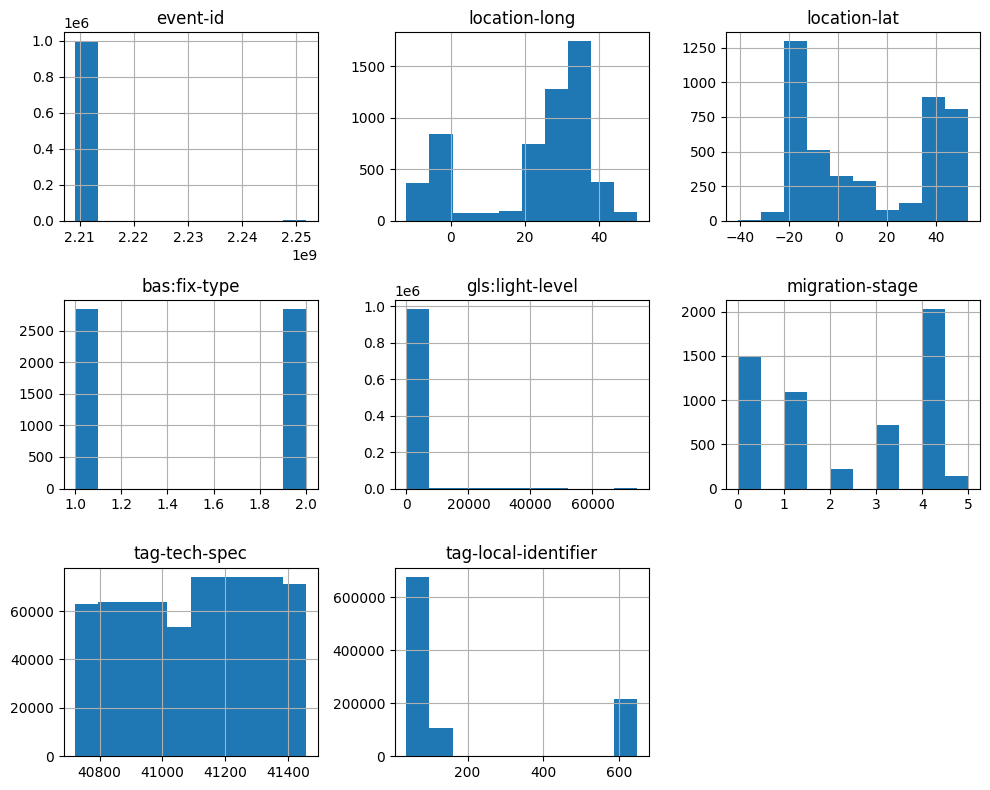

In [12]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


#### Distribuição das variáveis categóricas

In [13]:
data['migration-stage'].value_counts()

migration-stage
4.0    2029
0.0    1484
1.0    1095
3.0     716
2.0     216
5.0     138
Name: count, dtype: int64

In [14]:
data['tag-tech-spec'].value_counts()

tag-tech-spec
40722.001433    1
41141.297286    1
41141.300063    1
41141.301452    1
41141.302841    1
               ..
40825.263510    1
40825.266982    1
40825.270454    1
40825.273927    1
41453.708623    1
Name: count, Length: 674790, dtype: int64

In [15]:
data['sensor-type'].value_counts()

sensor-type
solar-geolocator-raw    996484
solar-geolocator          5678
Name: count, dtype: int64

In [16]:
# Estatísticas descritivas para variáveis numéricas
print(data[['location-long', 'location-lat']].describe())

# Converter a coluna 'timestamp' para datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Verificar a diferença de tempo entre os pontos
time_diff = data['timestamp'].diff()
print(time_diff.describe())


       location-long  location-lat
count    5678.000000   4403.000000
mean       22.609273     12.243999
std        15.923390     26.940950
min       -12.008952    -40.997110
25%        17.783771    -14.747498
50%        29.492676      6.024986
75%        33.671719     42.550016
max        50.158776     53.268842
count                      1002161
mean     0 days 00:01:35.105942059
std      1 days 15:49:26.328227201
min           -1101 days +03:49:03
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:05:00
max                2 days 11:55:00
Name: timestamp, dtype: object


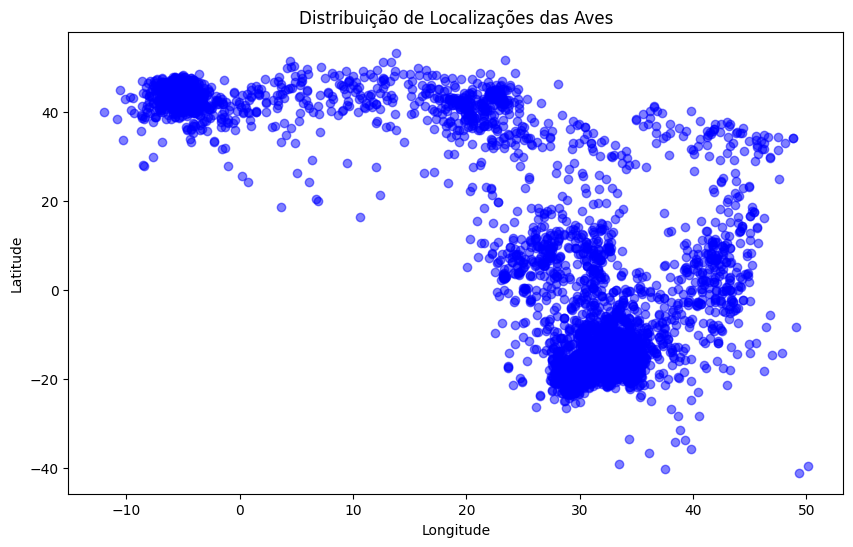

In [17]:
# Plotando as localizações
plt.figure(figsize=(10, 6))
plt.scatter(data['location-long'], data['location-lat'], c='blue', alpha=0.5)
plt.title('Distribuição de Localizações das Aves')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


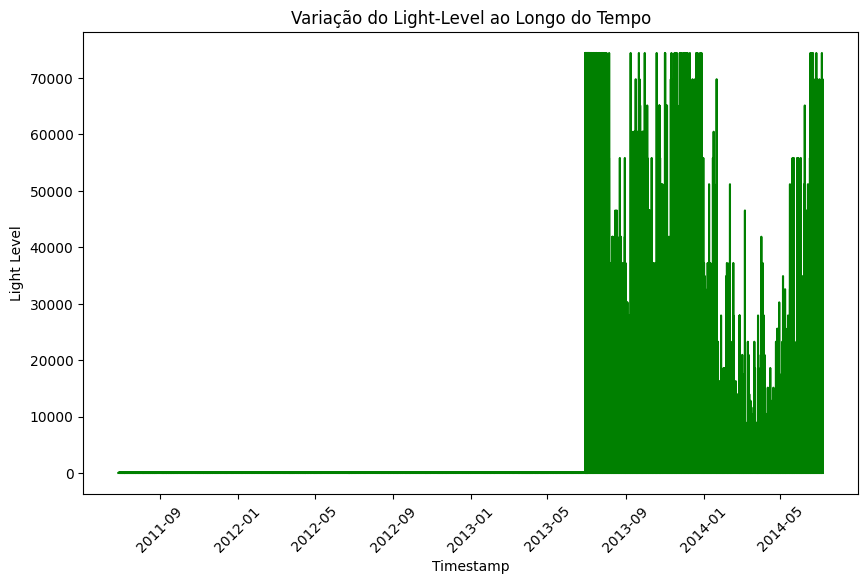

In [18]:
# Convertendo timestamp para datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Plotando light-level ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['gls:light-level'], color='green')
plt.title('Variação do Light-Level ao Longo do Tempo')
plt.xlabel('Timestamp')
plt.ylabel('Light Level')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Contagem das transições
print(data['bas:transition-1'].value_counts())
print(data['bas:transition-2'].value_counts())


bas:transition-1
19/07/2013 20:23    2
15/04/2012 03:22    2
19/09/2013 16:48    2
26/01/2012 16:31    2
25/04/2012 03:00    2
                   ..
03/04/2013 15:37    1
03/04/2013 03:48    1
02/04/2013 15:42    1
02/04/2013 04:06    1
02/07/2014 20:13    1
Name: count, Length: 5510, dtype: int64
bas:transition-2
29/02/2012 03:33    2
04/08/2013 04:50    2
05/08/2013 04:50    2
05/08/2013 19:58    2
06/08/2013 05:00    2
                   ..
04/04/2013 15:51    1
04/04/2013 04:00    1
03/04/2013 15:37    1
03/04/2013 03:48    1
03/07/2014 04:40    1
Name: count, Length: 5508, dtype: int64


In [20]:
# Número de tags únicas
print(data['tag-local-identifier'].nunique())

# Número de aves diferentes
print(data['individual-local-identifier'].nunique())


7
6


C:\Users\luisg\AppData\Local\Temp\ipykernel_19804\216851945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='migration-stage', data=data, palette='viridis')


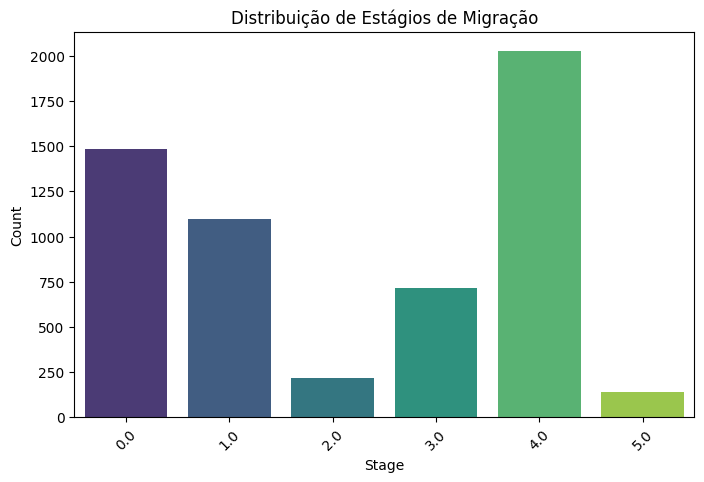

In [21]:
# Gráfico de barras para a distribuição de 'migration-stage'
plt.figure(figsize=(8, 5))
sns.countplot(x='migration-stage', data=data, palette='viridis')
plt.title('Distribuição de Estágios de Migração')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [22]:
# # Histograma de light-level
# plt.figure(figsize=(8, 5))
# sns.histplot(data['gls:light-level'], kde=True, color='orange')
# plt.title('Distribuição dos Níveis de Luz (light-level)')
# plt.xlabel('Light Level')
# plt.ylabel('Frequency')
# plt.show()


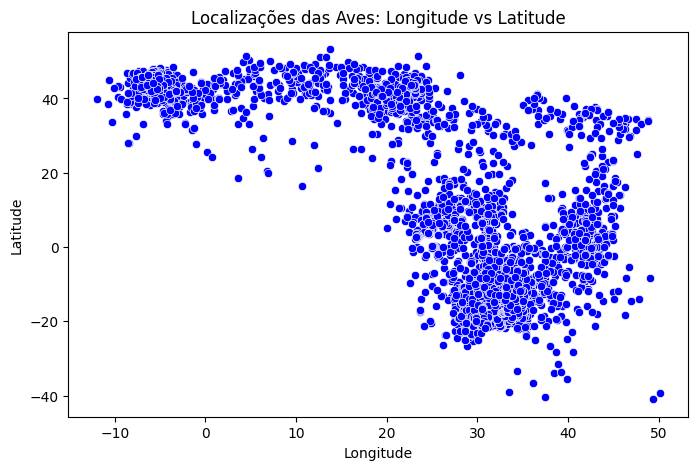

In [23]:
# Scatter plot para longitude vs latitude
plt.figure(figsize=(8, 5))
sns.scatterplot(x='location-long', y='location-lat', data=data, color='blue')
plt.title('Localizações das Aves: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\luisg\AppData\Local\Temp\ipykernel_19804\3539360627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=data, palette='coolwarm')


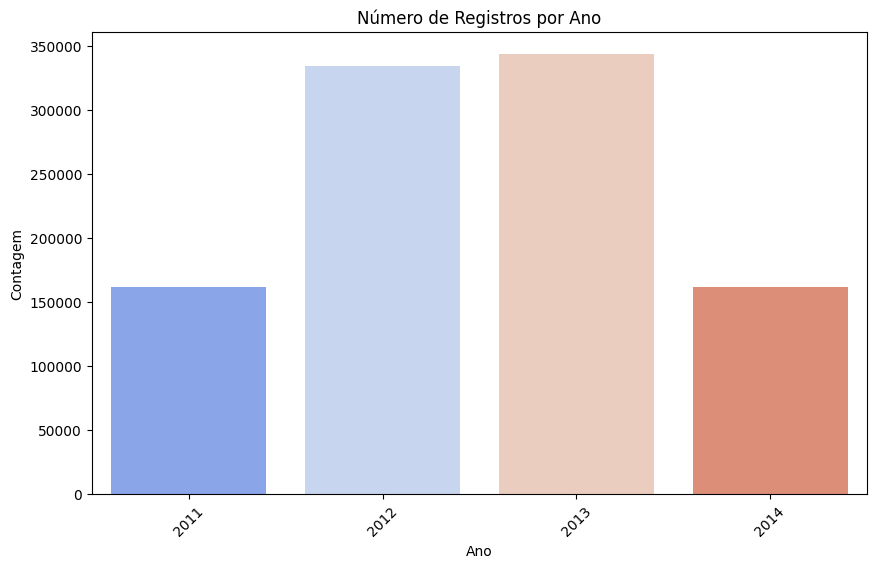

In [24]:
# Extraindo o ano do timestamp
data['year'] = data['timestamp'].dt.year

# Gráfico de barras para a quantidade de dados por ano
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data, palette='coolwarm')
plt.title('Número de Registros por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


In [25]:
# # Gráfico de barras para as transições de migração
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# # bas:transition-1
# sns.countplot(x='bas:transition-1', data=data, ax=ax[0], palette='Set2')
# ax[0].set_title('Transições de Migração (bas:transition-1)')
# ax[0].set_xlabel('Transição 1')
# ax[0].set_ylabel('Contagem')

# # bas:transition-2
# sns.countplot(x='bas:transition-2', data=data, ax=ax[1], palette='Set2')
# ax[1].set_title('Transições de Migração (bas:transition-2)')
# ax[1].set_xlabel('Transição 2')
# ax[1].set_ylabel('Contagem')

# plt.tight_layout()
# plt.show()


C:\Users\luisg\AppData\Local\Temp\ipykernel_19804\351552893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sensor-type', data=data, palette='Blues')


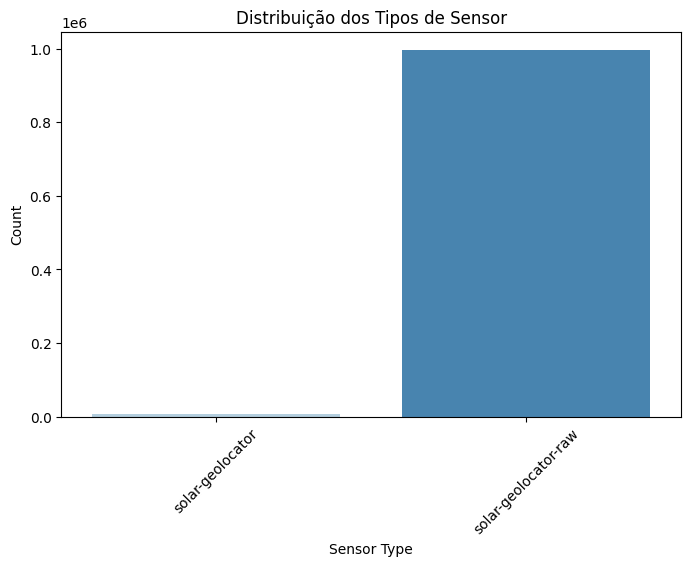

In [26]:
# Gráfico de barras para o tipo de sensor
plt.figure(figsize=(8, 5))
sns.countplot(x='sensor-type', data=data, palette='Blues')
plt.title('Distribuição dos Tipos de Sensor')
plt.xlabel('Sensor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\luisg\AppData\Local\Temp\ipykernel_19804\2699706456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='individual-taxon-canonical-name', data=data, palette='viridis')


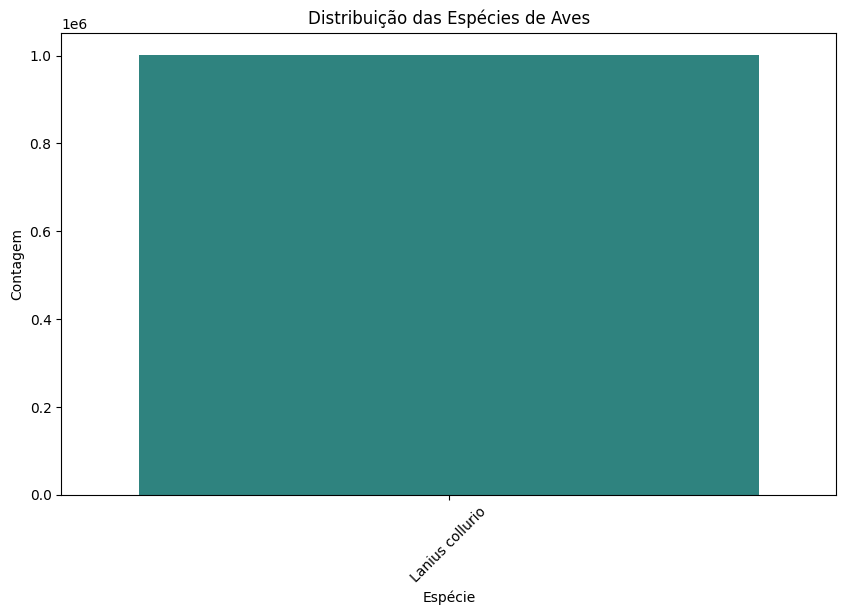

In [27]:
# Gráfico de barras para as espécies
plt.figure(figsize=(10, 6))
sns.countplot(x='individual-taxon-canonical-name', data=data, palette='viridis')
plt.title('Distribuição das Espécies de Aves')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Remover linhas com valores ausentes em 'location-lat' ou 'location-long'
data_clean = data.dropna(subset=['location-lat', 'location-long'])

# Criar o mapa novamente com os dados limpos
m = folium.Map(location=[data_clean['location-lat'].mean(), data_clean['location-long'].mean()], zoom_start=4)

# Adicionar marcadores
for idx, row in data_clean.iterrows():
    folium.CircleMarker([row['location-lat'], row['location-long']], radius=3, color='blue').add_to(m)

# Exibir o mapa
m


In [29]:


# # Criar um mapa centrado nas coordenadas médias
# m = folium.Map(location=[data['location-lat'].mean(), data['location-long'].mean()], zoom_start=4)

# # Adicionar marcadores para cada localização
# for idx, row in data.iterrows():
#     folium.CircleMarker([row['location-lat'], row['location-long']], radius=3, color='blue').add_to(m)

# # Exibir o mapa
# m
